>Binning method analysis in Eukaryotic data 

In [153]:
import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

>> Functions to get eukariotic percentage

In [8]:
def filter_eukaryotic_bins(bin_sample,bin_method, directory): 
    
    """
    bin_sample(str) with parenthesis,:  bin sample from Binning softwares(Metabat2, MaxBin, Binsanity) directory. 
    bin_method(str) with parenthesis: name of binning method 
    
    Eukaryota contig names 
    Note: Only list of contigs names from mmseq result. You can obtain it with these commands:
    #filter MMSeq results by only eukaryota organims 
    grep -E 'Eukaryota' output.mmseq > eukaryota.mmseq
    # extract contigs names 
    awk '{ print $2}' eukaryota.mmseq > eukaryota.contigs.names.mmseq
    
    """
    
    f2 = open('/global/cscratch1/sd/luciabw/Populus/eukaryota.contigs.names.mmseq', 'r')
    f1 = open(bin_sample, 'r')
    f3 = open(directory + (bin_sample.split('/')[8])+str('.')+bin_method+str('.eukaryote'),'w')
    
    eukaryotic_contigs = {}
    for line in f2:
        eukaryotic_contigs[line[:-1]] = 1
        
    skip = 0
    for line in f1:
        if line[0] == '>':
            _splitline = line.split('|')
            accessorIDWithArrow = _splitline[0]
            accessorID = accessorIDWithArrow[1:-1]
            
            if accessorID in eukaryotic_contigs:
                f3.write(line)
                skip = 0
            else:
                skip = 1
        else:
            if not skip:
                f3.write(line)
    
    f1.close()
    f2.close()
    f3.close()
    

def eukaryote_percentage(bin_sample, eukaryotic_bins): 
    
    """
    bin_sample(str) with parenthesis,:  path where bins from Binning softwares(Metabat2, MaxBin, Binsanity) are. 
    eukaryiotic_bins(str) with parenthesis: path of filter_eukaryotic_bins function. 
    """
    f1 = open(bin_sample, 'r') # Caution keep the bin name as 7 argument to correct output
    f2 = open(eukaryotic_bins, 'r')
    
    f1 = f1.read()
    f2 = f2.read()

    contig_bin_eukaryotes = len(f2)
    contig_bin = len(f1)
                     
    name = str((bin_sample.split('/')[8]))
    percentage = (contig_bin_eukaryotes/contig_bin)*100
    df = {'Name':[name], 'Percentage':[percentage]}
    df = pd.DataFrame(df)
    df.to_csv(eukaryotic_bins+str('.percentage'), index=False, header=None)


>> Functions to get non-homologous percentage

In [9]:
def filter_nonhomologous_bins(bin_sample,bin_method, directory): 
    
    """
    bin_sample(str) with parenthesis,:  bin sample from Binning softwares(Metabat2, MaxBin, Binsanity) directory. 
    bin_method(str) with parenthesis: name of binning method 
    
    #
    awk '{ print $2}' output.mmseq > whole.contigs.names.mmseq
    
    """
    f2 = open('/global/cscratch1/sd/luciabw/Populus/whole.contigs.names.mmseq', 'r')
    f1 = open(bin_sample, 'r')
    f3 = open((directory + bin_sample.split('/')[8])+str('.')+bin_method+str('.nonhomologous'),'w')
    
    nonhomologous_contigs = {}
    for line in f2:
        nonhomologous_contigs[line[:-1]] = 1
        
    skip = 0
    for line in f1:
        if line[0] == '>':
            _splitline = line.split('|')
            accessorIDWithArrow = _splitline[0]
            accessorID = accessorIDWithArrow[1:-1]
            
            if accessorID not in nonhomologous_contigs:
                f3.write(line)
                skip = 0
            else:
                skip = 1
        else:
            if not skip:
                f3.write(line)
    
    f1.close()
    f2.close()
    f3.close()
    
    
def nonhomologous_percentage(bin_sample, nonhomologous_bins): 
    
    """
    bin_sample(str) with parenthesis,:  path where bins from Binning softwares(Metabat2, MaxBin, Binsanity) are. 
    nonhomologous_bins(str) with parenthesis: path of nonhomologous_bins function. 
    """
    
    f1 = open(bin_sample, 'r') # Caution keep the bin name as 7 argument to correct output
    f2 = open(nonhomologous_bins, 'r')
    data = pd.DataFrame()

    f1 = f1.read()
    f2 = f2.read()

    contig_bin_nonhomologous = len(f2)
    contig_bin = len(f1)
    
    name = str((bin_sample.split('/')[8]))
    percentage = (contig_bin_nonhomologous/contig_bin)*100
    df = {'Name':[name], 'Percentage':[percentage]}
    df = pd.DataFrame(df)
    df.to_csv(nonhomologous_bins+str('.percentage'), index=False, header=None)
    

>> Functions to get bacteriapercentage

In [10]:
def filter_bacteria_bins(bin_sample,bin_method, directory): 
    
    """
    bin_sample(str) with parenthesis,:  bin sample from Binning softwares(Metabat2, MaxBin, Binsanity) directory. 
    bin_method(str) with parenthesis: name of binning method 
    
    Eukaryota contig names 
    Note: Only list of contigs names from mmseq result. You can obtain it with these commands:
    #filter MMSeq results by only unclassified organims 
    grep  -i -v -E 'Eukaryota' output.mmseq > bacteria.mmseq
    /global/projectb/scratch/asalamov/BINNING_test/3300006020.mmseq
    # extract contigs names 
    awk '{ print $2}' bacteria.mmseq > bacteria.contigs.names.mmseq
    
    """
    f2 = open('/global/cscratch1/sd/luciabw/Populus/bacteria.contigs.names.mmseq', 'r')
    f1 = open(bin_sample, 'r')
    f3 = open((directory + bin_sample.split('/')[8])+str('.')+bin_method+str('.bacteria'),'w')
    
    bacteria_contigs = {}
    for line in f2:
        bacteria_contigs[line[:-1]] = 1
        
    skip = 0
    for line in f1:
        if line[0] == '>':
            _splitline = line.split('|')
            accessorIDWithArrow = _splitline[0]
            accessorID = accessorIDWithArrow[1:-1]
            
            if accessorID in bacteria_contigs:
                f3.write(line)
                skip = 0
            else:
                skip = 1
        else:
            if not skip:
                f3.write(line)
    
    f1.close()
    f2.close()
    f3.close()
    

def bacteria_percentage(bin_sample, bacteria_bins): 
    
    """
    bin_sample(str) with parenthesis,:  path where bins from Binning softwares(Metabat2, MaxBin, Binsanity) are. 
    bacteria_bins(str) with parenthesis: path of bacteria_bins function. 
    """
    
    f1 = open(bin_sample, 'r') # Caution keep the bin name as 7 argument to correct output
    f2 = open(bacteria_bins, 'r')
    data = pd.DataFrame()

    f1 = f1.read()
    f2 = f2.read()

    contig_bin_bacteria = len(f2)
    contig_bin = len(f1)
    
    name = str((bin_sample.split('/')[8]))
    percentage = (contig_bin_bacteria/contig_bin)*100
    df = {'Name':[name], 'Percentage':[percentage]}
    df = pd.DataFrame(df)
    df.to_csv(bacteria_bins+str('.percentage'), index=False, header=None)



In [11]:
def run_to_get_percentages(path_method_bins, path_filtered_bins, method, organism):
    """
    path_method_bins(str): path where the bins for binning software are. Example: '/global/cscratch1/sd/luciabw/E_metabat_results/bins/'
    path_filtered_bins(str) : path where the output for filtered. Example: '/global/cscratch1/sd/luciabw/E_metabat_results/bacteria_bins/'
    method(str) = method of binnig method . Example: metabat, maxbin, binsanity
    organism(str) = desire organism to look. Example: Bacteria, Eukaryote or non-homologous
    """
    
    #Run filter function for every bin
    files = glob.glob(path_method_bins+'*')
    for file in files:
        if organism=='eukaryote':
            filter_eukaryotic_bins(file, method, path_filtered_bins)
        
        elif organism=='bacteria':
            filter_bacteria_bins(file, method, path_filtered_bins)
            
        else:
            filter_nonhomologous_bins(file, method, path_filtered_bins)
    
    
    #Percentage of eukaryote
    path, dirs, files = next(os.walk(path_filtered_bins))
    file_count = len(files)
    
    #Percentage of eukaryote 
    ls = [*range(1, file_count+1, 1)]
    
    for i in ls:
        if organism=='bacteria':
            bacteria_percentage(path_method_bins+'bin.'+str(i)+'.fa',  path_filtered_bins+'/bin.'+str(i)+'.fa.'+method +'.bacteria')
        
        elif organism=='eukaryote':
            eukaryote_percentage(path_method_bins+'bin.'+str(i)+'.fa',  path_filtered_bins+'/bin.'+str(i)+'.fa.'+method +'.eukaryote')
        else:
            nonhomologous_percentage(path_method_bins+'bin.'+str(i)+'.fa',  path_filtered_bins+'/bin.'+str(i)+'.fa.'+method +'.nonhomologous')
    

>> Input for busco
1) Extract contig names for every bin to run in BUSCO

Example to run for all bins of some binning tools:

```
files = glob.glob('/global/cscratch1/sd/luciabw/E_metabat_results/bins/*')
for file in files:
    contig_names(file, 'metabat')
```

In [12]:
#Function to get input for BUSCO
# extract just contigs names for every bin 
def contig_names(bin_sample, bin_method):
    f1 = open(bin_sample, 'r')
    contig_name = open((bin_sample.split('/')[8])+str('.')+bin_method+str('.contig.names'),'w')
    ID = []
    for line in f1:
        if line[0] == '>':
            _splitline = line.split('|')
            accessorIDWithArrow = _splitline[0]
            accessorID = accessorIDWithArrow[1:-1]
            ID.append(accessorID)
    for element in ID:
        contig_name.write(element + "\n")

    contig_name.close()
    f1.close()

<h1> Metabat2 Results

In [13]:
eukaryote_metabat = run_to_get_percentages('/global/cscratch1/sd/luciabw/Populus/metabat/bins/', '/global/cscratch1/sd/luciabw/Populus/metabat/eukaryote_bins/', 'metabat', 'eukaryote')
#then apply cat bin.*.fa.metabat.eukaryote.percentage > eukaryote.percentages
bacteria_metabat = run_to_get_percentages('/global/cscratch1/sd/luciabw/Populus/metabat/bins/', '/global/cscratch1/sd/luciabw/Populus/metabat/bacteria_bins/', 'metabat', 'bacteria')
#then apply cat bin.*.fa.metabat.bacteria.percentage > bacteria.percentages
nonhomologous_metabat = run_to_get_percentages('/global/cscratch1/sd/luciabw/Populus/metabat/bins/', '/global/cscratch1/sd/luciabw/Populus/metabat/nonhomologous_bins/', 'metabat', 'nonhomologous')
#then apply cat bin.*.fa.metabat.nonhomologous.percentage > nonhomologous.percentages

In [217]:
euk_percent = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/metabat/eukaryote_bins/eukaryote.percentages', header=None, names=['bin','eukaryote'])
bac_percent = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/metabat/bacteria_bins/bacteria.percentages', header=None, names=['bin','non-eukaryote'])
nonhomo_percent = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/metabat/nonhomologous_bins/nonhomologous.percentages', header=None, names=['bin','non-homologous'])
#look for command just_bin_size
bin_size = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/metabat/bin.size', header=None, names=['size'])
#for bins names just run cd /global/cscratch1/sd/luciabw/E_metabat_results/bins and then ls > bin.names
bin_names = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/metabat/bin.names', header=None, names=['bin'])
bin_sizes = pd.concat([bin_names, bin_size], axis=1)

In [225]:
a= pd.merge(euk_percent, bac_percent,on="bin")
b= pd.merge(a, nonhomo_percent, on="bin")
c= pd.merge(b, bin_sizes, on="bin")
c['size'] = c['size'].div(1000000)
c = c.rename(columns={"size": "size(Mb)"})
eighty =  c['eukaryote']>85
c = c[eighty]


c = c.sort_values(by=['size(Mb)', 'eukaryote'], ascending=False)
summary_metabat = c.head(6)

size = summary_metabat[['bin','size(Mb)']]

euka_percent = summary_metabat[['bin','eukaryote','non-eukaryote','non-homologous']]
summary_metabat

,bin,eukaryote,non-eukaryote,non-homologous,size(Mb)
2,bin.11.fa,88.814717,1.400569,9.784714,227.781351
9,bin.18.fa,95.502006,0.639080,3.858915,56.897042
27,bin.34.fa,99.605997,0.000000,0.394003,25.495660
6,bin.15.fa,99.782960,0.000000,0.217040,21.661596
53,bin.58.fa,99.612049,0.000000,0.387951,17.924899
46,bin.51.fa,99.832563,0.000000,0.167437,11.575916


In [114]:
# Run contig_name function to just one bin
#contig_names('/global/cscratch1/sd/luciabw/E_metabat_results/bins/bin.24.fa', 'metabat')
files = glob.glob('/global/cscratch1/sd/luciabw/Populus/metabat/bins/*')
for file in files:
    contig_names(file, 'metabat')

In [116]:
#Command to return only protein sequences that are present in x contig 
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' bin.11.fa.metabat.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.11.metabat
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' bin.18.fa.metabat.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.18.metabat
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' bin.34.fa.metabat.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.34.metabat
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' bin.15.fa.metabat.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.15.metabat
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' bin.58.fa.metabat.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.58.metabat
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' bin.51.fa.metabat.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.51.metabat


In [119]:
#Command to run BUSCO
# busco -i input.busco.bin.11.metabat -l eukaryota_odb10 --mode prot -c 8 --out output.busco.bin.11.metabat


#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.11.metabat/short_summary.specific.eukaryota_odb10.output.busco.bin.11.metabat.txt
#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.18.metabat/short_summary.specific.eukaryota_odb10.output.busco.bin.18.metabat.txt
#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.34.metabat/short_summary.specific.eukaryota_odb10.output.busco.bin.34.metabat.txt
!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.15.metabat/short_summary.specific.eukaryota_odb10.output.busco.bin.15.metabat.txt
!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.58.metabat/short_summary.specific.eukaryota_odb10.output.busco.bin.58.metabat.txt
!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.51.metabat/short_summary.specific.eukaryota_odb10.output.busco.bin.51.metabat.txt

# BUSCO version is: 5.0.0 
# The lineage dataset is: eukaryota_odb10 (Creation date: 2020-09-10, number of 
species: 70, number of BUSCOs: 255)
# Summarized benchmarking in BUSCO notation for file /global/cscratch1/sd/luciab
w/Populus/input.busco.bin.15.metabat
# BUSCO was run in mode: proteins

	***** Results: *****

	C:62.4%[S:61.2%,D:1.2%],F:11.0%,M:26.6%,n:255	   
	159	Complete BUSCOs (C)			   
	156	Complete and single-copy BUSCOs (S)	   
	3	Complete and duplicated BUSCOs (D)	   
	28	Fragmented BUSCOs (F)			   
	68	Missing BUSCOs (M)			   
	255	Total BUSCO groups searched		   
# BUSCO version is: 5.0.0 
# The lineage dataset is: eukaryota_odb10 (Creation date: 2020-09-10, number of 
species: 70, number of BUSCOs: 255)
# Summarized benchmarking in BUSCO notation for file /global/cscratch1/sd/luciab
w/Populus/input.busco.bin.58.metabat
# BUSCO was run in mode: proteins

	***** Results: *****

	C:6.3%[S:3.9%,D:2.4%],F:2.4%,M:91.3%,n:255	   
	16	Complete BUSCOs (C)			   
	10	Complete a

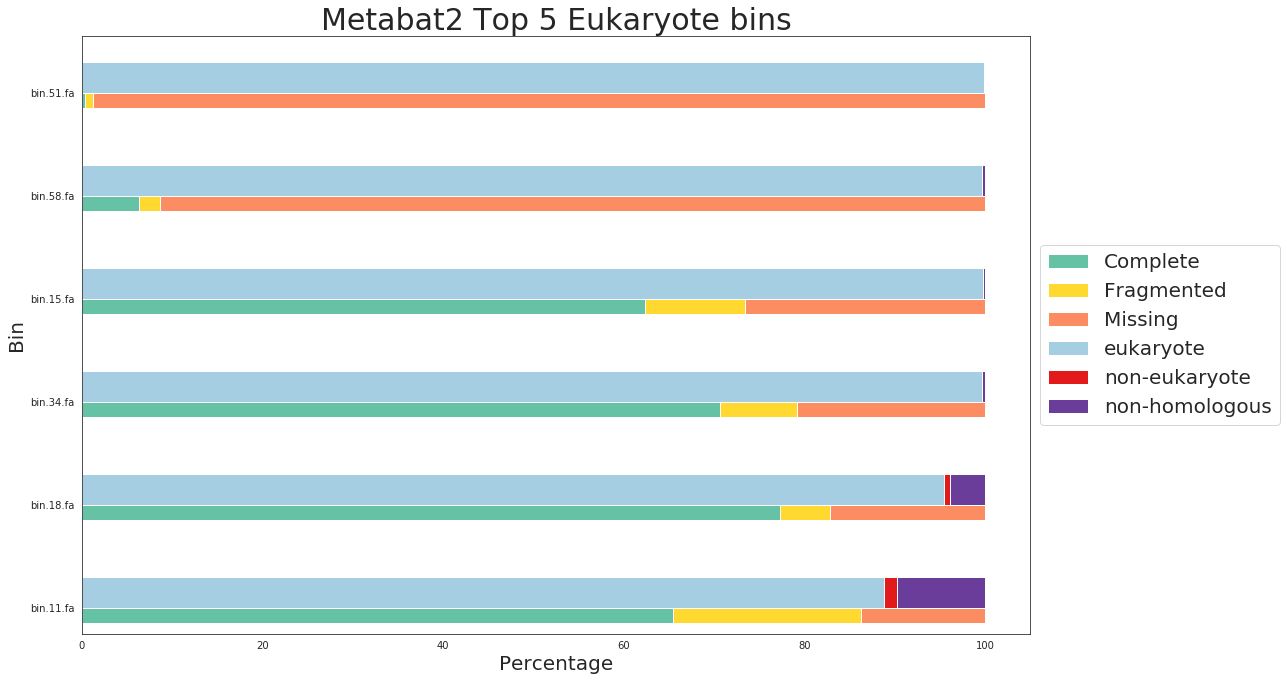

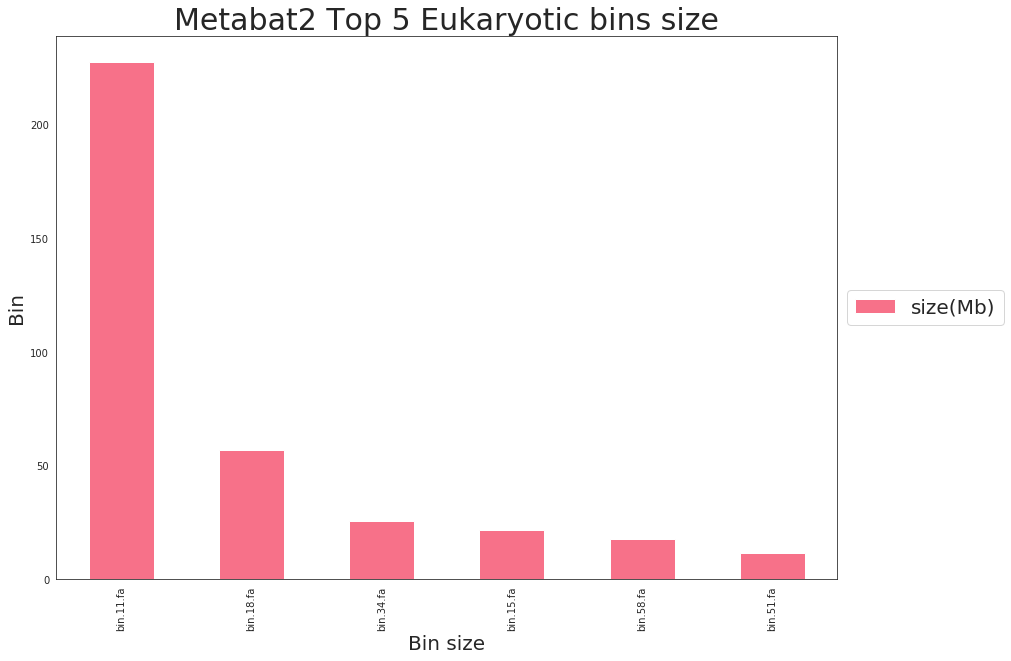

In [228]:
busco_summary_metabat = [['bin.11.fa', 65.5,20.8,13.7],
                    ['bin.18.fa', 77.3,5.5,17.2],
                    ['bin.34.fa', 70.6,8.6,20.8], 
                    ['bin.15.fa', 62.4,11.0,26.6],
                    ['bin.58.fa', 6.3,2.4,91.3],
                    ['bin.51.fa', 0.4,0.8,98.8]
                   ]
busco_summary_metabat = pd.DataFrame(busco_summary_metabat, columns = ['bin', 'Complete', 'Fragmented', 'Missing'])

sns.set_style(style='white')
import matplotlib


fig, ax = plt.subplots()

#size.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("husl", 10)), ax=ax, position=1,width=0.3,
#          figsize=(17,11))

busco_summary_metabat.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("Set2", 10)),ax=ax,position=0.5,width=0.3,
          figsize=(17,11))
euka_percent.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("Paired", 10)), ax=ax, position=0,width=0.3,
          figsize=(17,11))


plt.title('Metabat2 Top 5 Eukaryote bins', size=30)
plt.xlabel('Percentage', size=20)
plt.ylabel('Bin',size=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":20})
plt.show()

size.set_index('bin').plot(kind='bar', stacked=True, colormap=ListedColormap(sns.color_palette("husl", 10)),
          figsize=(14,10))

plt.title('Metabat2 Top 5 Eukaryotic bins size', size=30)
plt.xlabel('Bin size', size=20)
plt.ylabel('Bin',size=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":20})
plt.show()

In [354]:
correlation_metabat = pd.merge(summary_metabat, busco_summary_metabat, on="bin")
correlation_metabat['method'] = 'metabat'

correlation_maxbin = pd.merge(summary_maxbin, busco_summary_maxbin, on="bin")
correlation_maxbin['method'] = 'maxbin'

busco_summary_binsanity = busco_summary_binsanity.rename(columns={"bin":"bad_bin", "Complete":"Complete", "Fragmented":"Fragmented", "Missing":"Missing"})
correlation_binsanity = pd.concat([summary_binsanity.reset_index(drop=True), busco_summary_binsanity.reset_index(drop=True)], axis=1)
correlation_binsanity = correlation_binsanity.drop(correlation_binsanity.columns[[5]], axis=1) 
correlation_binsanity['method'] = 'binsanity'

correlation_vamb = pd.merge(summary_vamb, busco_summary_vamb, on="bin")
correlation_vamb['method'] = 'vamb'

correlation_concoct = pd.merge(summary_concoct, busco_summary_concoct, on="bin")
correlation_concoct['method'] = 'concoct'

frames = [correlation_metabat, correlation_maxbin, correlation_binsanity, correlation_vamb, correlation_concoct]
result = pd.concat(frames)

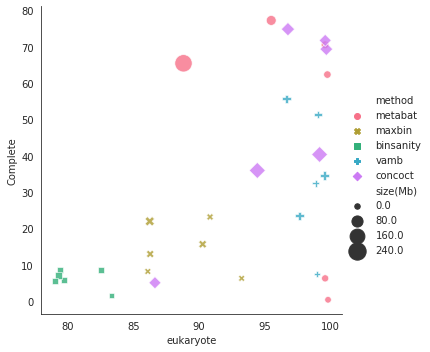

In [355]:
sns.relplot(
    data=result,
    x="eukaryote", y="Complete",
    hue="method", size="size(Mb)", style='method', palette="husl", sizes=(30, 300), alpha=0.8)

<h1> MaxBin Results

In [22]:
def run_to_get_percentages_maxbin(path_method_bins, path_filtered_bins, method, organism):
    """
    path_method_bins(str): path where the bins for binning software are. Example: '/global/cscratch1/sd/luciabw/E_metabat_results/bins/'
    path_filtered_bins(str) : path where the output for filtered. Example: '/global/cscratch1/sd/luciabw/E_metabat_results/bacteria_bins/'
    method(str) = method of binnig method . Example: metabat, maxbin, binsanity
    organism(str) = desire organism to look. Example: Bacteria, Eukaryote or non-homologous
    """
    
    #Run filter function for every bin
    files = glob.glob(path_method_bins+'*')
    for file in files:
        if organism=='eukaryote':
            filter_eukaryotic_bins(file, method, path_filtered_bins)
        
        elif organism=='bacteria':
            filter_bacteria_bins(file, method, path_filtered_bins)
            
        else:
            filter_nonhomologous_bins(file, method, path_filtered_bins)
    
    
    #Percentage of eukaryote
    path, dirs, files = next(os.walk(path_filtered_bins))
    file_count = len(files)
    
    #Percentage of eukaryote 
    ls = [*range(1, file_count+1, 1)]
    
    ls2= []
    for i in ls:
            ls2.append(str(i).zfill(3))
    
    for i in ls2:
        if organism=='bacteria':
            bacteria_percentage(path_method_bins+'bin.'+str(i)+'.fasta',  path_filtered_bins+'/bin.'+str(i)+'.fasta.'+method +'.bacteria')
        
        elif organism=='eukaryote':
            eukaryote_percentage(path_method_bins+'bin.'+str(i)+'.fasta',  path_filtered_bins+'/bin.'+str(i)+'.fasta.'+method +'.eukaryote')
        else:
            nonhomologous_percentage(path_method_bins+'bin.'+str(i)+'.fasta',  path_filtered_bins+'/bin.'+str(i)+'.fasta.'+method +'.nonhomologous')
    

In [23]:
eukaryote_maxbin = run_to_get_percentages_maxbin('/global/cscratch1/sd/luciabw/Populus/maxbin/bins/', '/global/cscratch1/sd/luciabw/Populus/maxbin/eukaryote_bins/', 'maxbin', 'eukaryote')
#then apply cat bin.*.fasta.maxbin.eukaryote.percentage > eukaryote.percentages
bacteria_maxbin = run_to_get_percentages_maxbin('/global/cscratch1/sd/luciabw/Populus/maxbin/bins/', '/global/cscratch1/sd/luciabw/Populus/maxbin/bacteria_bins/', 'maxbin', 'bacteria')
#then apply cat bin.*.fasta.maxbin.bacteria.percentage > bacteria.percentages
nonhomologous_maxbin = run_to_get_percentages_maxbin('/global/cscratch1/sd/luciabw/Populus/maxbin/bins/', '/global/cscratch1/sd/luciabw/Populus/maxbin/nonhomologous_bins/', 'maxbin', 'nonhomologous')
#then apply cat bin.*.fasta.maxbin.nonhomologous.percentage > nonhomologous.percentages

In [266]:
euk_percent_maxbin = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/maxbin/eukaryote_bins/eukaryote.percentages', header=None, names=['bin','eukaryote'])
bac_percent_maxbin = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/maxbin/bacteria_bins/bacteria.percentages', header=None, names=['bin','non-eukaryote'])
nonhomo_percent_maxbin = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/maxbin/nonhomologous_bins/nonhomologous.percentages', header=None, names=['bin','non-homologous'])

bin_size_maxbin = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/maxbin/bin.size', header=None, names=['size'])
bin_names_maxbin = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/maxbin/bin.names', header=None, names=['bin'])
#bin_names_maxbin = bin_names_maxbin.rename(columns={'bin.names': 'bin'})
bin_sizes_maxbin = pd.concat([bin_names_maxbin, bin_size_maxbin], axis=1)


In [281]:
a= pd.merge(euk_percent_maxbin, bac_percent_maxbin,on="bin")
b= pd.merge(a, nonhomo_percent_maxbin, on="bin")
c= pd.merge(b, bin_sizes_maxbin, on="bin")
c['size'] = c['size'].div(1000000)
c = c.rename(columns={"size": "size(Mb)"})
eighty =  c['eukaryote']>85
c = c[eighty]

c = c.sort_values(by=['size(Mb)','eukaryote'], ascending=False)
summary_maxbin = c.head(6)
size = summary_maxbin[['bin','size(Mb)']]

euka_percent = summary_maxbin[['bin','eukaryote','non-eukaryote','non-homologous']]
summary_maxbin

,bin,eukaryote,non-eukaryote,non-homologous,size(Mb)
45,bin.046.fasta,86.242405,4.193534,9.564061,49.704211
6,bin.007.fasta,90.274773,1.643716,8.081511,30.400069
40,bin.041.fasta,86.277556,7.265814,6.456630,25.687282
27,bin.028.fasta,90.837507,7.027671,2.134822,14.889381
24,bin.025.fasta,86.093572,6.373692,7.532736,11.643533
17,bin.018.fasta,93.246077,5.773337,0.980586,10.703307


In [126]:
# Run contig_name function to just one bin
files = glob.glob('/global/cscratch1/sd/luciabw/Populus/maxbin/bins/*')
for file in files:
    contig_names(file, 'maxbin')
#Command to return only protein sequences that are present in x contig 
#!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' bin.126.fasta.maxbin.contig.names /global/cscratch1/sd/luciabw/E_metaeuk/combined.mmseq > input.busco.bin.126.maxbin

In [128]:
#Command to return only protein sequences that are present in x contig 
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' bin.046.fasta.maxbin.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.046.maxbin
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' bin.007.fasta.maxbin.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.007.maxbin
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' bin.041.fasta.maxbin.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.041.maxbin
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' bin.028.fasta.maxbin.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.028.maxbin
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' bin.025.fasta.maxbin.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.025.maxbin
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' bin.018.fasta.maxbin.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.018.maxbin

#Command to run BUSCO
#busco -i input.busco.bin.046.maxbin -l eukaryota_odb10 --mode prot -c 8 --out output.busco.bin.046.maxbin

In [176]:
#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.046.maxbin/short_summary.specific.eukaryota_odb10.output.busco.bin.046.maxbin.txt
#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.007.maxbin/short_summary.specific.eukaryota_odb10.output.busco.bin.007.maxbin.txt
#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.041.maxbin/short_summary.specific.eukaryota_odb10.output.busco.bin.041.maxbin.txt
#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.028.maxbin/short_summary.specific.eukaryota_odb10.output.busco.bin.028.maxbin.txt
#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.025.maxbin/short_summary.specific.eukaryota_odb10.output.busco.bin.025.maxbin.txt
#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.018.maxbin/short_summary.specific.eukaryota_odb10.output.busco.bin.018.maxbin.txt


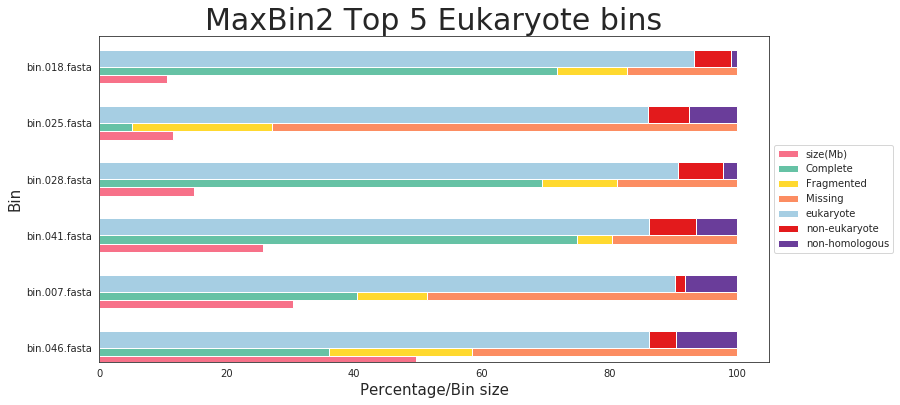

In [290]:
busco_summary_maxbin = [['bin.046.fasta', 22.0,17.3,60.7],
                           ['bin.007.fasta', 15.7,4.7,79.6], 
                           ['bin.041.fasta', 13.0,5.9,81.1],
                           ['bin.028.fasta', 23.2,9.4,67.4],
                           ['bin.025.fasta', 8.2,3.1,88.7],
                          ['bin.018.fasta', 6.3,2.4,91.3]]
busco_summary_maxbin = pd.DataFrame(busco_summary_maxbin, columns = ['bin', 'Complete', 'Fragmented', 'Missing'])

sns.set_style(style='white')
import matplotlib


fig, ax = plt.subplots()


size.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("husl", 10)), ax=ax, position=1,width=0.3,
          figsize=(12,6))

busco_summary.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("Set2", 10)),ax=ax,position=0.5,width=0.3,
          figsize=(12,6))
euka_percent.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("Paired", 10)), ax=ax, position=0,width=0.3,
          figsize=(12,6))

plt.title('MaxBin2 Top 5 Eukaryote bins', size=30)
plt.xlabel('Percentage/Bin size', size=15)
plt.ylabel('Bin', size=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



<h1> Binsanity Results

In [43]:
def run_to_get_percentages_binsanity(path_method_bins, path_filtered_bins, method, organism):
    """
    path_method_bins(str): path where the bins for binning software are. Example: '/global/cscratch1/sd/luciabw/E_metabat_results/bins/'
    path_filtered_bins(str) : path where the output for filtered. Example: '/global/cscratch1/sd/luciabw/E_metabat_results/bacteria_bins/'
    method(str) = method of binnig method . Example: metabat, maxbin, binsanity
    organism(str) = desire organism to look. Example: Bacteria, Eukaryote or non-homologous
    """
    
    #Run filter function for every bin
    files = glob.glob(path_method_bins+'*')
    for file in files:
        if organism=='eukaryote':
            filter_eukaryotic_bins(file, method, path_filtered_bins)
        
        elif organism=='bacteria':
            filter_bacteria_bins(file, method, path_filtered_bins)
            
        else:
            filter_nonhomologous_bins(file, method, path_filtered_bins)
    
    
    #Percentage of eukaryote
    path, dirs, files = next(os.walk(path_filtered_bins))
    file_count = len(files)
    
    
    #Percentage of eukaryote 
    ls = [*range(0, 100, 1)]
    
    
    for i in ls:
        try:
            if organism=='bacteria':
                bacteria_percentage(path_method_bins+'BinSanityLC-kmean-bin_'+str(i)+'.fna',  path_filtered_bins+'/BinSanityLC-kmean-bin_'+str(i)+'.fna.'+method +'.bacteria')
                
            elif organism=='eukaryote':
                eukaryote_percentage(path_method_bins+'BinSanityLC-kmean-bin_'+str(i)+'.fna',  path_filtered_bins+'/BinSanityLC-kmean-bin_'+str(i)+'.fna.'+method +'.eukaryote')
            
            else:
                nonhomologous_percentage(path_method_bins+'BinSanityLC-kmean-bin_'+str(i)+'.fna',  path_filtered_bins+'/BinSanityLC-kmean-bin_'+str(i)+'.fna.'+method +'.nonhomologous')
                
        except:
            continue
            
    

In [166]:
#eukaryote_binsanity = run_to_get_percentages_binsanity('/global/cscratch1/sd/luciabw/Populus/binsanity/bins/', '/global/cscratch1/sd/luciabw/Populus/binsanity/eukaryote_bins/', 'binsanity', 'eukaryote')
#then apply cat BinSanityLC-kmean-bin_*.fna.binsanity.eukaryote.percentage > eukaryote.percentages
#bacteria_binsanity = run_to_get_percentages_binsanity('/global/cscratch1/sd/luciabw/Populus/binsanity/bins/', '/global/cscratch1/sd/luciabw/Populus/binsanity/bacteria_bins/', 'binsanity', 'bacteria')
#then apply cat BinSanityLC-kmean-bin_*.fna.binsanity.bacteria.percentage > bacteria.percentages
#nonhomologous_binsanity = run_to_get_percentages_binsanity('/global/cscratch1/sd/luciabw/Populus/binsanity/bins/', '/global/cscratch1/sd/luciabw/Populus/binsanity/nonhomologous_bins/', 'binsanity', 'nonhomologous')
#then apply cat BinSanityLC-kmean-bin_*.fna.binsanity.nonhomologous.percentage > nonhomologous.percentages

In [333]:
euk_percent_binsanity = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/binsanity/eukaryote_bins/eukaryote.percentages', header=None, names=['bin','eukaryote'])
bac_percent_binsanity = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/binsanity/bacteria_bins/bacteria.percentages', header=None, names=['bin','non-eukaryote'])
nonhomo_percent_binsanity = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/binsanity/nonhomologous_bins/nonhomologous.percentages', header=None, names=['bin','non-homologous'])

bin_size_binsanity = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/binsanity/bin.size', header=None, names=['size'])
bin_names_binsanity = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/binsanity/bin.names', header=None, names=['bin'])
bin_sizes_binsanity = pd.concat([bin_names_binsanity, bin_size_binsanity], axis=1)

In [334]:
a= pd.merge(euk_percent_binsanity, bac_percent_binsanity,on="bin")
b= pd.merge(a, nonhomo_percent_binsanity, on="bin")
c= pd.merge(b, bin_sizes_binsanity, on="bin")
c['size'] = c['size'].div(1000000)
c = c.rename(columns={"size": "size(Mb)"})

#eighty =  c['eukaryote']>85
#c = c[eighty]

c = c.sort_values(by=['eukaryote', 'size(Mb)'], ascending=False)
summary_binsanity = c.head(6)
size = summary_binsanity[['bin','size(Mb)']]

euka_percent = summary_binsanity[['bin','eukaryote','non-eukaryote','non-homologous']]
summary_binsanity



,bin,eukaryote,non-eukaryote,non-homologous,size(Mb)
31,BinSanityLC-kmean-bin_43.fna,83.309870,16.690130,0.000000,0.693146
20,BinSanityLC-kmean-bin_30.fna,82.506826,17.212874,0.280299,7.582069
15,BinSanityLC-kmean-bin_25.fna,79.700849,20.299151,0.000000,3.739895
36,BinSanityLC-kmean-bin_5.fna,79.407935,19.736949,0.855116,11.619977
14,BinSanityLC-kmean-bin_24.fna,79.283073,20.388868,0.328059,9.678780
42,BinSanityLC-kmean-bin_55.fna,78.992835,21.007165,0.000000,5.712679


In [139]:
# Run contig_name function to just one bin
files = glob.glob('/global/cscratch1/sd/luciabw/Populus/binsanity/bins/*')
for file in files:
    contig_names(file, 'binsanity')



In [140]:
#Command to return only protein sequences that are present in x contig 
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' BinSanityLC-kmean-bin_43.fna.binsanity.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.43.binsanity
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' BinSanityLC-kmean-bin_30.fna.binsanity.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.30.binsanity
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' BinSanityLC-kmean-bin_25.fna.binsanity.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.25.binsanity
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' BinSanityLC-kmean-bin_5.fna.binsanity.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.5.binsanity
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' BinSanityLC-kmean-bin_24.fna.binsanity.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.24.binsanity
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' BinSanityLC-kmean-bin_55.fna.binsanity.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.55.binsanity


#busco -i input.busco.bin.6.binsanity -l eukaryota_odb10 --mode prot -c 8 --out output.busco.bin.6.binsanity
#!more /global/cscratch1/sd/luciabw/out.busco.bin.94.binsanity/short_summary.specific.eukaryota_odb10.out.busco.bin.94.binsanity.txt

In [142]:
#Command to run BUSCO
#busco -i input.busco.bin.43.binsanity -l eukaryota_odb10 --mode prot -c 8 --out output.busco.bin.43.binsanity
#busco -i input.busco.bin.30.binsanity -l eukaryota_odb10 --mode prot -c 8 --out output.busco.bin.30.binsanity
#busco -i input.busco.bin.25.binsanity -l eukaryota_odb10 --mode prot -c 8 --out output.busco.bin.25.binsanity
#busco -i input.busco.bin.5.binsanity -l eukaryota_odb10 --mode prot -c 8 --out output.busco.bin.5.binsanity
#busco -i input.busco.bin.24.binsanity -l eukaryota_odb10 --mode prot -c 8 --out output.busco.bin.24.binsanity
#busco -i input.busco.bin.55.binsanity -l eukaryota_odb10 --mode prot -c 8 --out output.busco.bin.55.binsanity

#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.43.binsanity/short_summary.specific.eukaryota_odb10.output.busco.bin.43.binsanity.txt
#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.30.binsanity/short_summary.specific.eukaryota_odb10.output.busco.bin.30.binsanity.txt
#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.25.binsanity/short_summary.specific.eukaryota_odb10.output.busco.bin.25.binsanity.txt
!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.5.binsanity/short_summary.specific.eukaryota_odb10.output.busco.bin.5.binsanity.txt
!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.24.binsanity/short_summary.specific.eukaryota_odb10.output.busco.bin.24.binsanity.txt
!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.55.binsanity/short_summary.specific.eukaryota_odb10.output.busco.bin.55.binsanity.txt

# BUSCO version is: 5.0.0 
# The lineage dataset is: eukaryota_odb10 (Creation date: 2020-09-10, number of 
species: 70, number of BUSCOs: 255)
# Summarized benchmarking in BUSCO notation for file /global/cscratch1/sd/luciab
w/Populus/input.busco.bin.5.binsanity
# BUSCO was run in mode: proteins

	***** Results: *****

	C:8.6%[S:8.6%,D:0.0%],F:1.6%,M:89.8%,n:255	   
	22	Complete BUSCOs (C)			   
	22	Complete and single-copy BUSCOs (S)	   
	0	Complete and duplicated BUSCOs (D)	   
	4	Fragmented BUSCOs (F)			   
	229	Missing BUSCOs (M)			   
	255	Total BUSCO groups searched		   
# BUSCO version is: 5.0.0 
# The lineage dataset is: eukaryota_odb10 (Creation date: 2020-09-10, number of 
species: 70, number of BUSCOs: 255)
# Summarized benchmarking in BUSCO notation for file /global/cscratch1/sd/luciab
w/Populus/input.busco.bin.24.binsanity
# BUSCO was run in mode: proteins

	***** Results: *****

	C:7.1%[S:7.1%,D:0.0%],F:4.3%,M:88.6%,n:255	   
	18	Complete BUSCOs (C)			   
	18	Complete and

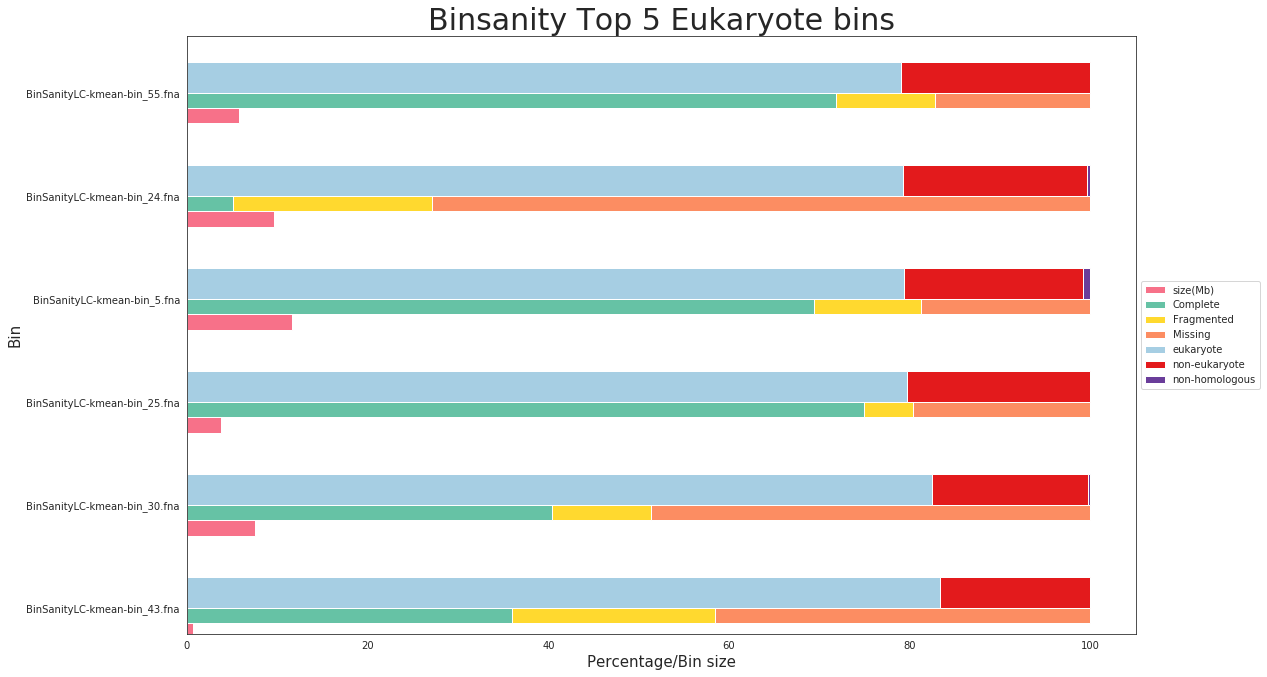

In [335]:
busco_summary_binsanity = [['bin.43.fa', 1.6,0.8,97.6],
                           ['bin.30.fa', 8.6,1.6,89.8], 
                           ['bin.25.fa', 5.9,2.0,92.1],
                           ['bin.5.fa', 8.6,1.6,89.8],
                           ['bin.24.fa', 7.1,4.3,88.6],
                             ['bin.55.fa', 5.5,1.2,93.3]]
busco_summary_binsanity = pd.DataFrame(busco_summary_binsanity, columns = ['bin', 'Complete', 'Fragmented', 'Missing'])

sns.set_style(style='white')
import matplotlib


fig, ax = plt.subplots()


size.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("husl", 10)), ax=ax, position=1,width=0.3,
          figsize=(17,11))

busco_summary.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("Set2", 10)),ax=ax,position=0.5,width=0.3,
          figsize=(17,11))
euka_percent.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("Paired", 10)), ax=ax, position=0,width=0.3,
          figsize=(17,11))




plt.title('Binsanity Top 5 Eukaryote bins', size=30)
plt.xlabel('Percentage/Bin size', size=15)
plt.ylabel('Bin', size=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



<h1> Vamb Results

In [54]:
vamp_cluster = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/vamb/vamb1/clusters.tsv', sep='\t', header=None, names=['bin','contig'])
vamb_bin_contigs = vamp_cluster.groupby('bin')['contig'].apply(list).reset_index(name='contigs')

In [61]:
#ls = []
#for index,row in vamb_bin_contigs.iterrows():
#    if len(row['contigs']) >50:
#        a =(row)
#        for i in a:
#            ls.append([i])
vamb = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/vamb/z2', header=None, delim_whitespace=True, names=['bin','contigs', 'size'])
#Filter just bin with size > 0.5 Mb
vamb = vamb[(vamb['size'] > 1000000)]
vamb = vamb.sort_values(by=['size'])
vamb.tail(15)


,bin,contigs,size
15,5350,1406,7745367.0
14,5455,1124,8253869.0
13,5203,884,8717971.0
12,5313,903,8808108.0
11,5340,1160,8991591.0
10,5662,1157,9233876.0
9,5275,1360,10002256.0
8,5478,441,10033193.0
7,5238,2008,11040244.0
6,5310,1621,11127282.0


In [62]:
for index,row in vamb_bin_contigs.iterrows():
    if len(row['contigs']) >120:
        textfile = open("/global/cscratch1/sd/luciabw/Populus/vamb/bins/bin."+str(row[0])+".fa", "w")
        a =(row['contigs'])
        for element in a:
            textfile.write(element + "\n")
        textfile.close()



In [94]:
def bins_vamb(bin_sample, directory): 
    
    """
    bin_sample(str) with parenthesis,: bin with contigs names only
    bin_method(str) with parenthesis: name of binning method 
    
    """
    
    f2 = open(bin_sample, 'r')
    f1 = open('/global/projectb/scratch/asalamov/BINNING_test/Populus/3300033180.a.fna', 'r')
    f3 = open(directory + (bin_sample.split('/')[8]),'w')
    
    eukaryotic_contigs = {}
    for line in f2:
        eukaryotic_contigs[line[:-1]] = 1
        
    skip = 0
    for line in f1:
        if line[0] == '>':
            _splitline = line.split('|')
            accessorIDWithArrow = _splitline[0]
            accessorID = accessorIDWithArrow[1:-1]
            
            if accessorID in eukaryotic_contigs:
                f3.write(line)
                skip = 0
            else:
                skip = 1
        else:
            if not skip:
                f3.write(line)
    
    f1.close()
    f2.close()
    f3.close()
    

def run_whole_bins(path_method_bins, path_filtered_bins):
    """
    path_method_bins(str): path where the bins for binning software are. Example: '/global/cscratch1/sd/luciabw/E_metabat_results/bins/'
    path_filtered_bins(str) : path where the output for filtered. Example: '/global/cscratch1/sd/luciabw/E_metabat_results/bacteria_bins/'
    method(str) = method of binnig method . Example: metabat, maxbin, binsanity
    organism(str) = desire organism to look. Example: Bacteria, Eukaryote or non-homologous
    """
    
    #Run filter function for every bin
    files = glob.glob(path_method_bins+'*')
    for file in files:
        bins_vamb(file, path_filtered_bins)
    print('Done, check your bins')


def run_to_get_percentages_vamb(path_method_bins, path_filtered_bins, method, organism):
    """
    path_method_bins(str): path where the bins for binning software are. Example: '/global/cscratch1/sd/luciabw/E_metabat_results/bins/'
    path_filtered_bins(str) : path where the output for filtered. Example: '/global/cscratch1/sd/luciabw/E_metabat_results/bacteria_bins/'
    method(str) = method of binnig method . Example: metabat, maxbin, binsanity
    organism(str) = desire organism to look. Example: Bacteria, Eukaryote or non-homologous
    """
    
    #Run filter function for every bin
    files = glob.glob(path_method_bins+'*')
    for file in files:
        if organism=='eukaryote':
            filter_eukaryotic_bins(file, method, path_filtered_bins)
        
        elif organism=='bacteria':
            filter_bacteria_bins(file, method, path_filtered_bins)
            
        else:
            filter_nonhomologous_bins(file, method, path_filtered_bins)
    
    
    #Percentage of eukaryote function

    files_2 = glob.glob(path_method_bins+'*')
    for file in files_2:
        if organism=='bacteria':
            bacteria_percentage(file,  path_filtered_bins+'bin.'+str(file[51:-3])+'.fa.'+method +'.bacteria')
                
        elif organism=='eukaryote':
            eukaryote_percentage(file,  path_filtered_bins+'bin.'+str(file[51:-3])+'.fa.'+method +'.eukaryote')
        else:
            nonhomologous_percentage(file,  path_filtered_bins+'bin.'+str(file[51:-3])+'.fa.'+method +'.nonhomologous')
            
    print('Done, check your percentages')
    
        
    

In [66]:
run_whole_bins('/global/cscratch1/sd/luciabw/Populus/vamb/bins_contignames/', '/global/cscratch1/sd/luciabw/Populus/vamb/bins/')

Done, check your bins


In [95]:
#import sys
#files_2 = glob.glob('/global/cscratch1/sd/luciabw/Populus/vamb/bins/'+'*')
#for file in files_2:
#    print(file[51:-3])


In [96]:
eukaryote_vam = run_to_get_percentages_vamb('/global/cscratch1/sd/luciabw/Populus/vamb/bins/', '/global/cscratch1/sd/luciabw/Populus/vamb/eukaryote_bins/', 'vamb', 'eukaryote')
#then apply cat bin.*.fa.vamb.eukaryote.percentage > eukaryote.percentages
bacteria_vamb = run_to_get_percentages_vamb('/global/cscratch1/sd/luciabw/Populus/vamb/bins/', '/global/cscratch1/sd/luciabw/Populus/vamb/bacteria_bins/', 'vamb', 'bacteria')
#then apply cat bin.*.fa.vamb.bacteria.percentage > bacteria.percentages
nonhomologous_vamb = run_to_get_percentages_vamb('/global/cscratch1/sd/luciabw/Populus/vamb/bins/', '/global/cscratch1/sd/luciabw/Populus/vamb/nonhomologous_bins/', 'vamb', 'nonhomologous')
#then apply cat bin.*.fa.vamb.nonhomologous.percentage > nonhomologous.percentages

Done, check your percentages
Done, check your percentages
Done, check your percentages


In [292]:
euk_percent = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/vamb/eukaryote_bins/eukaryote.percentages', header=None, names=['bin','eukaryote'])
bac_percent = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/vamb/bacteria_bins/bacteria.percentages', header=None, names=['bin','non-eukaryote'])
nonhomo_percent = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/vamb/nonhomologous_bins/nonhomologous.percentages', header=None, names=['bin','non-homologous'])
#look for command just_bin_size
bin_size = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/vamb/bin.size', header=None, names=['size'])
#for bins names just run cd /global/cscratch1/sd/luciabw/E_metabat_results/bins and then ls > bin.names
bin_names = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/vamb/bin.names', header=None, names=['bin'])
bin_sizes = pd.concat([bin_names, bin_size], axis=1)


a= pd.merge(euk_percent, bac_percent,on="bin")
b= pd.merge(a, nonhomo_percent, on="bin")
c= pd.merge(b, bin_sizes, on="bin")
c['size'] = c['size'].div(1000000)
c = c.rename(columns={"size": "size(Mb)"})
eighty =  c['eukaryote']>85
c = c[eighty]


c = c.sort_values(by=['size(Mb)', 'eukaryote'], ascending=False)
summary_vamb = c.head(6)

size = summary_vamb[['bin','size(Mb)']]

euka_percent = summary_vamb[['bin','eukaryote','non-eukaryote','non-homologous']]
summary_vamb

,bin,eukaryote,non-eukaryote,non-homologous,size(Mb)
28,bin.5194.fa,99.572240,0.036576,0.391184,53.296537
33,bin.5239.fa,96.650312,0.195260,3.154428,35.687399
29,bin.5196.fa,97.655441,0.070242,2.274317,34.234689
36,bin.5259.fa,99.076907,0.025798,0.897294,23.372344
35,bin.5242.fa,98.913597,0.336735,0.749668,16.575653
39,bin.5310.fa,98.987069,0.027084,0.985847,11.313560


In [152]:
#Command to return only protein sequences that are present in x contig 

!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' /global/cscratch1/sd/luciabw/Populus/vamb/bins_contignames/bin.5194.fa /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.5194.vamb
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' /global/cscratch1/sd/luciabw/Populus/vamb/bins_contignames/bin.5239.fa /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.5239.vamb
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' /global/cscratch1/sd/luciabw/Populus/vamb/bins_contignames/bin.5196.fa /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.5196.vamb
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' /global/cscratch1/sd/luciabw/Populus/vamb/bins_contignames/bin.5259.fa /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.5259.vamb
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' /global/cscratch1/sd/luciabw/Populus/vamb/bins_contignames/bin.5242.fa /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.5242.vamb
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' /global/cscratch1/sd/luciabw/Populus/vamb/bins_contignames/bin.5310.fa /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.5310.vamb

In [155]:
#Command to run BUSCO
#busco -i input.busco.bin.5259.vamb -l eukaryota_odb10 --mode prot -c 8 --out output.busco.bin.5259.vamb

#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.5194.vamb/short_summary.specific.eukaryota_odb10.output.busco.bin.5194.vamb.txt
#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.5239.vamb/short_summary.specific.eukaryota_odb10.output.busco.bin.5239.vamb.txt
#!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.5196.vamb/short_summary.specific.eukaryota_odb10.output.busco.bin.5196.vamb.txt
!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.5259.vamb/short_summary.specific.eukaryota_odb10.output.busco.bin.5259.vamb.txt
!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.5242.vamb/short_summary.specific.eukaryota_odb10.output.busco.bin.5242.vamb.txt
!more /global/cscratch1/sd/luciabw/Populus/output.busco.bin.5310.vamb/short_summary.specific.eukaryota_odb10.output.busco.bin.5310.vamb.txt


# BUSCO version is: 5.0.0 
# The lineage dataset is: eukaryota_odb10 (Creation date: 2020-09-10, number of 
species: 70, number of BUSCOs: 255)
# Summarized benchmarking in BUSCO notation for file /global/cscratch1/sd/luciab
w/Populus/input.busco.bin.5259.vamb
# BUSCO was run in mode: proteins

	***** Results: *****

	C:51.4%[S:47.5%,D:3.9%],F:10.2%,M:38.4%,n:255	   
	131	Complete BUSCOs (C)			   
	121	Complete and single-copy BUSCOs (S)	   
	10	Complete and duplicated BUSCOs (D)	   
	26	Fragmented BUSCOs (F)			   
	98	Missing BUSCOs (M)			   
	255	Total BUSCO groups searched		   
# BUSCO version is: 5.0.0 
# The lineage dataset is: eukaryota_odb10 (Creation date: 2020-09-10, number of 
species: 70, number of BUSCOs: 255)
# Summarized benchmarking in BUSCO notation for file /global/cscratch1/sd/luciab
w/Populus/input.busco.bin.5242.vamb
# BUSCO was run in mode: proteins

	***** Results: *****

	C:32.5%[S:29.4%,D:3.1%],F:9.4%,M:58.1%,n:255	   
	83	Complete BUSCOs (C)			   
	75	Complete 

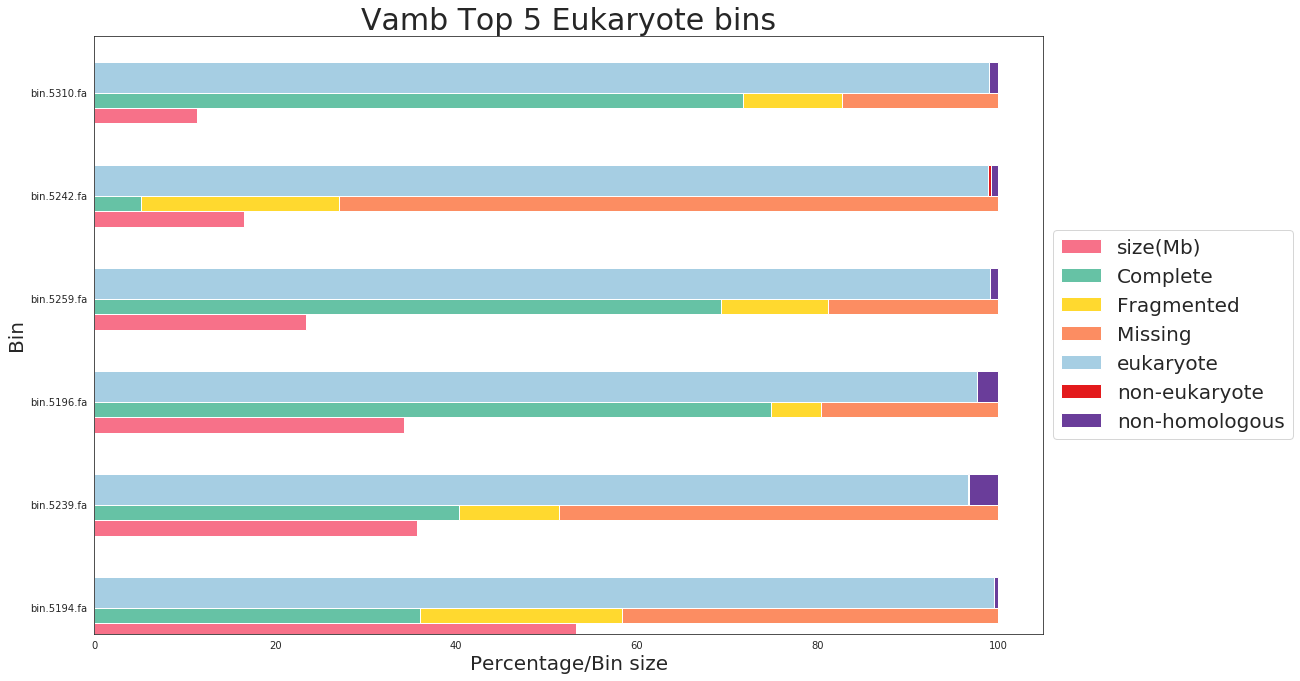

In [271]:
busco_summary_vamb = [['bin.5194.fa',34.6,8.6,56.8],
                           ['bin.5239.fa', 55.7,3.9,40.4], 
                           ['bin.5196.fa', 23.5,5.5,71.0],
                           ['bin.5259.fa', 51.4,10.2,38.4],
                      ['bin.5242.fa', 32.5,9.4,58.1],
                     ['bin.5310.fa', 7.5,3.5,89.0
                     ]]


busco_summary_vamb = pd.DataFrame(busco_summary_vamb, columns = ['bin', 'Complete', 'Fragmented', 'Missing'])

sns.set_style(style='white')
import matplotlib


fig, ax = plt.subplots()

size.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("husl", 10)), ax=ax, position=1,width=0.3,
          figsize=(17,11))

busco_summary.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("Set2", 10)),ax=ax,position=0.5,width=0.3,
          figsize=(17,11))
euka_percent.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("Paired", 10)), ax=ax, position=0,width=0.3,
          figsize=(17,11))







plt.title('Vamb Top 5 Eukaryote bins', size=30)
plt.xlabel('Percentage/Bin size', size=20)
plt.ylabel('Bin',size=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":20})
plt.show()



<h1> CONCOCT Results

In [102]:
def run_to_get_percentages_concoct(path_method_bins, path_filtered_bins, method, organism):
    """
    path_method_bins(str): path where the bins for binning software are. Example: '/global/cscratch1/sd/luciabw/E_metabat_results/bins/'
    path_filtered_bins(str) : path where the output for filtered. Example: '/global/cscratch1/sd/luciabw/E_metabat_results/bacteria_bins/'
    method(str) = method of binnig method . Example: metabat, maxbin, binsanity
    organism(str) = desire organism to look. Example: Bacteria, Eukaryote or non-homologous
    """
    
    #Run filter function for every bin
    files = glob.glob(path_method_bins+'*')
    for file in files:
        if organism=='eukaryote':
            filter_eukaryotic_bins(file, method, path_filtered_bins)
        
        elif organism=='bacteria':
            filter_bacteria_bins(file, method, path_filtered_bins)
            
        else:
            filter_nonhomologous_bins(file, method, path_filtered_bins)
    
    
    #Percentage of eukaryote
    path, dirs, files = next(os.walk(path_filtered_bins))
    file_count = len(files)
    
    #Percentage of eukaryote 
    ls = [*range(0, file_count, 1)]
    
    for i in ls:
        if organism=='bacteria':
            bacteria_percentage(path_method_bins+str(i)+'.fa',  path_filtered_bins+str(i)+'.fa.'+method +'.bacteria')
        
        elif organism=='eukaryote':
            eukaryote_percentage(path_method_bins+str(i)+'.fa',  path_filtered_bins+str(i)+'.fa.'+method +'.eukaryote')
        else:
            nonhomologous_percentage(path_method_bins+str(i)+'.fa',  path_filtered_bins+str(i)+'.fa.'+method +'.nonhomologous')
    

In [103]:
eukaryote_concoct = run_to_get_percentages_concoct('/global/cscratch1/sd/luciabw/Populus/concoct/bins/', '/global/cscratch1/sd/luciabw/Populus/concoct/eukaryote_bins/', 'concoct', 'eukaryote')
#then apply cat *.fa.concoct.eukaryote.percentage > eukaryote.percentages
bacteria_concoct = run_to_get_percentages_concoct('/global/cscratch1/sd/luciabw/Populus/concoct/bins/', '/global/cscratch1/sd/luciabw/Populus/concoct/bacteria_bins/', 'concoct', 'bacteria')
#then apply cat *.fa.concoct.bacteria.percentage > bacteria.percentages
nonhomologous_concoct = run_to_get_percentages_concoct('/global/cscratch1/sd/luciabw/Populus/concoct/bins/', '/global/cscratch1/sd/luciabw/Populus/concoct/nonhomologous_bins/', 'concoct', 'nonhomologous')
#then apply cat *.fa.concoct.nonhomologous.percentage > nonhomologous.percentages

In [297]:
euk_percent = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/concoct/eukaryote_bins/eukaryote.percentages', header=None, names=['bin','eukaryote'])
bac_percent = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/concoct/bacteria_bins/bacteria.percentages', header=None, names=['bin','non-eukaryote'])
nonhomo_percent = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/concoct/nonhomologous_bins/nonhomologous.percentages', header=None, names=['bin','non-homologous'])

bin_size = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/concoct/bin.size', header=None, names=['size'])
#for bins names just run cd /global/cscratch1/sd/luciabw/E_metabat_results/bins and then ls > bin.names
bin_names = pd.read_csv('/global/cscratch1/sd/luciabw/Populus/concoct/bin.names', header=None, names=['bin'])
bin_sizes = pd.concat([bin_names, bin_size], axis=1)

In [298]:
a= pd.merge(euk_percent, bac_percent,on="bin")
b= pd.merge(a, nonhomo_percent, on="bin")
c= pd.merge(b, bin_sizes, on="bin")
c['size'] = c['size'].div(1000000)
c = c.rename(columns={"size": "size(Mb)"})
eighty =  c['eukaryote']>85
c = c[eighty]


c = c.sort_values(by=['size(Mb)', 'eukaryote'], ascending=False)
summary_concoct = c.head(6)

size = summary_concoct[['bin','size(Mb)']]

euka_percent = summary_concoct[['bin','eukaryote','non-eukaryote','non-homologous']]
summary_concoct

,bin,eukaryote,non-eukaryote,non-homologous,size(Mb)
129,214.fa,94.440973,0.095202,5.463825,84.676388
46,14.fa,99.188298,0.127768,0.683934,82.705392
142,226.fa,96.775915,0.540967,2.683118,49.787798
70,161.fa,99.700226,0.000000,0.299774,44.280983
187,53.fa,86.638763,0.457171,12.904066,37.449374
159,28.fa,99.614816,0.043693,0.341491,36.921989


In [160]:
# Run contig_name function to whole bins 
files = glob.glob('/global/cscratch1/sd/luciabw/Populus/concoct/bins/*')
for file in files:
    contig_names(file, 'concoct')
    
#Output looks like: bin.[number].[method].contig.names

In [161]:
#Command to return only protein sequences that are present in x contig 
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' 214.fa.concoct.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.214.concoct
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' 14.fa.concoct.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.14.concoct
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' 226.fa.concoct.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.226.concoct
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' 161.fa.concoct.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.161.concoct
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' 53.fa.concoct.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.53.concoct
!awk -F'[|]' 'NR==FNR{ids[$0];next}$3 in ids{p=2}p>0;{p--}' 28.fa.concoct.contig.names /global/cscratch1/sd/luciabw/Populus/combined.metaeuk > input.busco.bin.28.concoct

In [164]:
#Command to run BUSCO
#busco -i input.busco.bin.214.concoct -l eukaryota_odb10 --mode prot -c 8 --out out.busco.bin.214.concoct

#!more /global/cscratch1/sd/luciabw/Populus/out.busco.bin.214.concoct/short_summary.specific.eukaryota_odb10.out.busco.bin.214.concoct.txt
#!more /global/cscratch1/sd/luciabw/Populus/out.busco.bin.14.concoct/short_summary.specific.eukaryota_odb10.out.busco.bin.14.concoct.txt
#!more /global/cscratch1/sd/luciabw/Populus/out.busco.bin.226.concoct/short_summary.specific.eukaryota_odb10.out.busco.bin.226.concoct.txt
!more /global/cscratch1/sd/luciabw/Populus/out.busco.bin.161.concoct/short_summary.specific.eukaryota_odb10.out.busco.bin.161.concoct.txt
!more /global/cscratch1/sd/luciabw/Populus/out.busco.bin.53.concoct/short_summary.specific.eukaryota_odb10.out.busco.bin.53.concoct.txt
!more /global/cscratch1/sd/luciabw/Populus/out.busco.bin.28.concoct/short_summary.specific.eukaryota_odb10.out.busco.bin.28.concoct.txt


# BUSCO version is: 5.0.0 
# The lineage dataset is: eukaryota_odb10 (Creation date: 2020-09-10, number of 
species: 70, number of BUSCOs: 255)
# Summarized benchmarking in BUSCO notation for file /global/cscratch1/sd/luciab
w/Populus/input.busco.bin.161.concoct
# BUSCO was run in mode: proteins

	***** Results: *****

	C:69.4%[S:63.5%,D:5.9%],F:11.8%,M:18.8%,n:255	   
	177	Complete BUSCOs (C)			   
	162	Complete and single-copy BUSCOs (S)	   
	15	Complete and duplicated BUSCOs (D)	   
	30	Fragmented BUSCOs (F)			   
	48	Missing BUSCOs (M)			   
	255	Total BUSCO groups searched		   
# BUSCO version is: 5.0.0 
# The lineage dataset is: eukaryota_odb10 (Creation date: 2020-09-10, number of 
species: 70, number of BUSCOs: 255)
# Summarized benchmarking in BUSCO notation for file /global/cscratch1/sd/luciab
w/Populus/input.busco.bin.53.concoct
# BUSCO was run in mode: proteins

	***** Results: *****

	C:5.1%[S:4.7%,D:0.4%],F:22.0%,M:72.9%,n:255	   
	13	Complete BUSCOs (C)			   
	12	Complet

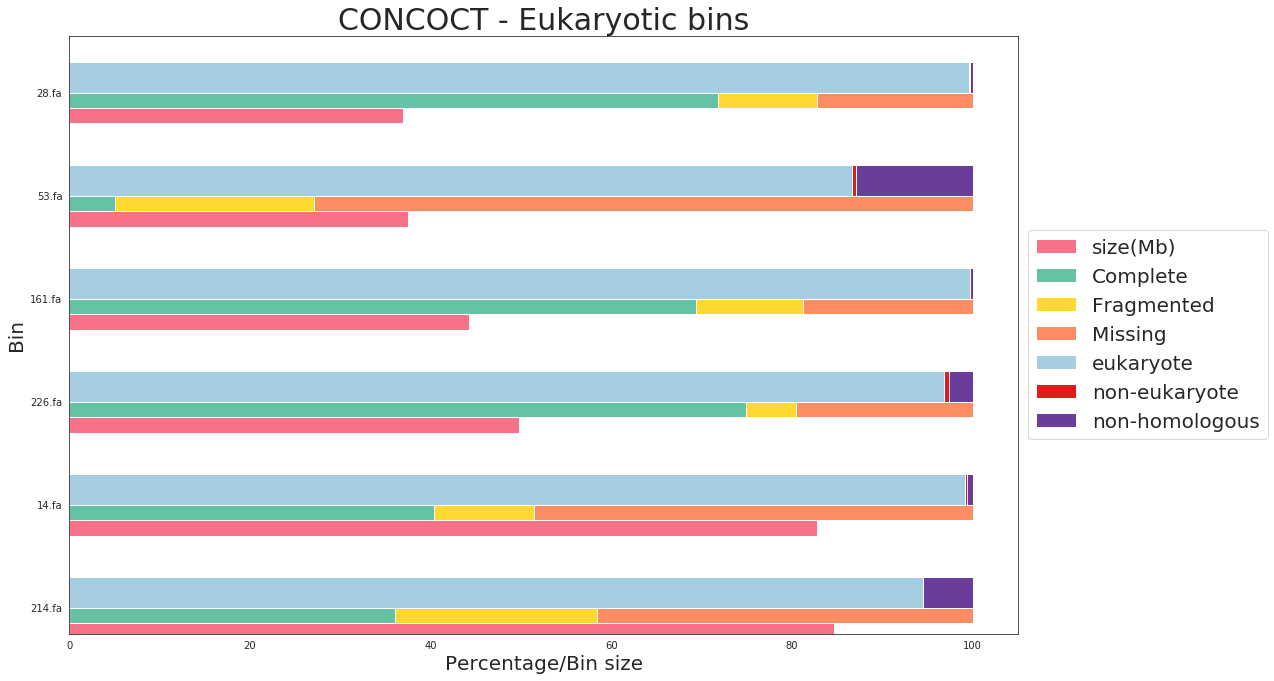

In [299]:
#!more /global/cscratch1/sd/luciabw/E_busco/concoct/out.busco.bin.236.concoct/short_summary.specific.eukaryota_odb10.out.busco.bin.236.concoct.txt
#!more /global/cscratch1/sd/luciabw/E_busco/concoct/out.busco.bin.17.concoct/short_summary.specific.eukaryota_odb10.out.busco.bin.17.concoct.txt
#!more /global/cscratch1/sd/luciabw/E_busco/concoct/out.busco.bin.215.concoct/short_summary.specific.eukaryota_odb10.out.busco.bin.215.concoct.txt
#!more /global/cscratch1/sd/luciabw/E_busco/concoct/out.busco.bin.192.concoct/short_summary.specific.eukaryota_odb10.out.busco.bin.192.concoct.txt
#!more /global/cscratch1/sd/luciabw/E_busco/concoct/out.busco.bin.233.concoct/short_summary.specific.eukaryota_odb10.out.busco.bin.233.concoct.txt
busco_summary_concoct = [['214.fa', 36.0,22.4,41.6], 
                   ['14.fa',40.4,11.0,48.6], 
                    ['226.fa', 74.9,5.5,19.6], 
                    ['161.fa', 69.4,11.8,18.8], 
                    ['53.fa', 5.1,22.0,72.9],
                   ['28.fa', 71.8,11.0,17.2]]
busco_summary_concoct = pd.DataFrame(busco_summary_concoct, columns = ['bin', 'Complete', 'Fragmented', 'Missing'])

sns.set_style(style='white')
import matplotlib
fig, ax = plt.subplots()

size.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("husl", 10)), ax=ax, position=1,width=0.3,
          figsize=(17,11))

busco_summary_concoct.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("Set2", 10)),ax=ax,position=0.5,width=0.3,
          figsize=(17,11))
euka_percent.set_index('bin').plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("Paired", 10)), ax=ax, position=0,width=0.3,
          figsize=(17,11))


plt.title('CONCOCT - Eukaryotic bins', size=30)
plt.xlabel('Percentage/Bin size', size=20)
plt.ylabel('Bin',size=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":20})
plt.show()
